#### **Find the following integral using the simpson's 1/3 rule**

Simpson's 1/3 rule uses higher-order polynomials to approximate the integral of a function $f(x)$ over the interval $[a,b]$. For Example, if there is an extra point midway between $f(a)$ and $f(b)$, the three points can be connected with a parabola. The area under the parabola is an approximation of the integral of $f(x)$ over the interval $[a,b]$.

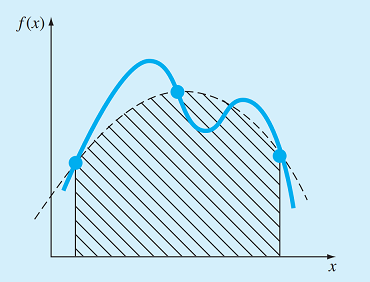

If we are given values of $f(x)$ at 3 points as $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ then we can estimate $f(x)$ using the Lagrange polynomial of degree 2: 

$$
\begin{align*}
f(x) &\approx f(x_0) \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} 
\end{align*}
$$

Now, as the area under the estimated curve is an approximation of the integral of $f(x)$ over the interval $[a,b]$, we can write the integral as:

$$
\begin{align*}
I &= \int_{a}^{b} f(x) dx \\
&\approx \int_{a}^{b} \left[f(x_0)\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} \right] dx 
\end{align*}
$$

When $a = x_0$, $b = x_2$, $x_1 = \frac{a+b}{2}$, and $h = \frac{b-a}{2}$, we can simplify the integral to:

$$
\begin{align*}
    I &\approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + f(x_2) \right] \\
    &= (b-a) \frac{f(x_0) + 4f(x_1) + f(x_2)}{6}
\end{align*}
$$

We will use Simpson's 1/3 rule to approximate the integral of $f(x) = 0.2 + 25x - P^3 x^2 + Q^3 x^3 - 100Rx^4 + 400x^5$, where, PQR are last 3 digits of your roll number, over the interval $[0, 0.8]$. Follow the steps below to approximate the integral using Simpson's 1/3 rule.

##### **Step 1: Define the function**

Define a function `f` that takes a single parameter `x` and returns the value of $f(x) = 0.2 + 25x - P^3 x^2 + Q^3 x^3 - 100Rx^4 + 400x^5$ at `x`. Note that the function should be able to handle both scalar and vector inputs.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Write appropriate code
def f(x):
  return 0.2+25*x-216*(x**2)-700*(x**4)+400*(x**5)    #last 3 digits 607

##### **Step 2: Define a function to approximate the function $f(x)$ using Lagrange polynomial**

Define a function `lagrange` that takes four parameters `x0`, `x1`, `x2` and `x` and returns the value of the Lagrange polynomial of degree 2 at `x`. The function should be able to handle both scalar and vector inputs. Use the function `f` defined in Step 1 to evaluate the function at the given points. 

In [ ]:
# write appropriate code
def lagrange (x0, x1, x2, x):
    f_x0 = f(x0)
    f_x1 = f(x1)
    f_x2 = f(x2)
    
    numerator1 = (x - x1) * (x - x2)
    denominator1 = (x0 - x1) * (x0 - x2)
    term1 = (f_x0 * numerator1) / denominator1
    
    numerator2 = (x - x0) * (x - x2)
    denominator2 = (x1 - x0) * (x1 - x2)
    term2 = (f_x1 * numerator2) / denominator2
    
    numerator3 = (x - x0) * (x - x1)
    denominator3 = (x2 - x0) * (x2 - x1)
    term3 = (f_x2 * numerator3) / denominator3
    
    result = term1 + term2 + term3
    return result

##### **Step 3: Define the interval**
Define the interval as a numpy array of two elements, where the first element is the lower bound and the second element is the upper bound. Name the array `interval`.

In [ ]:
# Write appropriate code
interval = np.array([0, 0.8])

##### **Step 4: Plot the function and the approximated polynomial**

Plot the function $f(x)$ and the approximated polynomial using the function `lagrange` defined in Step 2. Use the interval defined in Step 3 as the x-axis. Also, plot the points $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ on the same plot. Fill the area under the approximated polynomial using numpy's `fill_between` function.

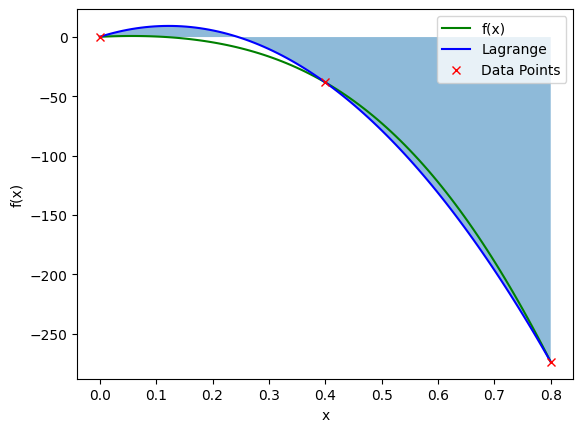

In [ ]:
# Write appropriate code
x = np.linspace(interval[0], interval[1], 100)
y = f(x)

midpoint = (interval[0] + interval[1])/2
y0 = f(interval[0]) #0
y1= f(midpoint) #0.4
y2 = f(interval[1]) #0.8

y_lang = lagrange (interval[0], midpoint, interval[1], x)

plt.plot(x, y, 'g', label = "f(x)")
plt.plot(x, y_lang, 'b', label = "Lagrange")
plt.fill_between(x, y_lang, alpha = 0.5)

plt.plot([interval[0], midpoint, interval[1]], [y0, y1, y2], 'rx', label='Data Points')

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()

##### **Step 5: Define a function to approximate the integral using Simpson's 1/3 rule**

Define a function `simpson` that takes a parameter `interval` and returns the approximate value of the integral of $f(x)$ over the interval `interval` using Simpson's 1/3 rule. You have to employ the following steps:

*   Calculate the midpoint of the interval. Store the value in a variable named `midpoint`.
*   Calculate the value of $f(x_0)$, $f(x_1)$, and $f(x_2)$, where $x_0 = a$, $x_1 = \frac{a+b}{2} = midpoint$, and $x_2 = b$. Store the values in variables named `f0`, `f1`, and `f2` respectively.
*   Calculate the approximate value of the integral using Simpson's 1/3 rule. Store the value in a variable named `I`.
*   Return the value of `I`.

In [ ]:
# Write appropriate code
def simspon (interval):
  midpoint = (interval[0] + interval[1])/2
  f0 = f(interval[0])
  f1 = f(midpoint)
  f2 = f(interval[1])

  I = ((interval[1] - interval[0]) * (f0+4*f1+f2)) / 6

  return I

##### **Step 6: Approximate the integral using Simpson's 1/3 rule**

Call the function `simpson` with the interval `interval` as the parameter. Store the value returned by the function in a variable named `I`. Print the value of `I`. Then you should compute the integral analytically and find the absolute relative error between the two values. Print the absolute relative error.

In [48]:
# Write appropriate code
I = simspon (interval)
print (I)
I_real = -57.10293333

error = abs((I_real - I)/I_real)
print(error)
print(f"Error: {error * 100:.5f}%")

-56.829866666666675
0.004782007637948506
Error: 0.47820%
